# Wafer map notebook
This notebook maps out wafer thickness maps from ellipsometry data. Data consists of wafer mapping carried out in LNF's Woolam ellipsometer.

## Import libraries

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import griddata
import re
from matplotlib.ticker import MaxNLocator

## Import and clean data

In [199]:
# Import raw data from excel file and collect sheet names
data = pd.ExcelFile('20180514_ZnO_SnO2.xlsx')
samples = data.sheet_names

# Get x and y coordinates from ellipsometry map
df = pd.read_excel(data, sheetname=samples[0])
coords = df['Position (cm)']
x = [float((re.findall(r"[-+]?\d*\.*\d+", coords[i])[0])) for i in range(5, len(coords))]
y = [float((re.findall(r"[-+]?\d*\.*\d+", coords[i])[1])) for i in range(5, len(coords))]

# Get column name with thickness
col_name = df.columns[2]

# Initialize data frame with x and y
df = pd.DataFrame({'x':x, 'y':y})

# Update data frame with thickness columns
for sample in samples:
    thickness = pd.read_excel(data, sheetname=sample)[col_name]
    df[sample] =  thickness[5:len(thickness)].reset_index(drop=True)

## Define interpolation parameters

In [200]:
# target grid for interpolation
xi = yi = np.arange(min(x)-0.1,max(x)+0.1,0.01)
xi,yi = np.meshgrid(xi,yi)


## Interpolate and plot

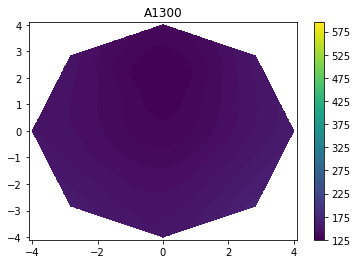

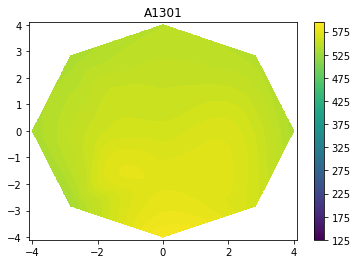

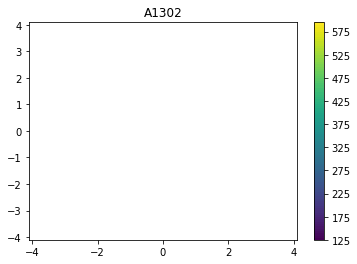

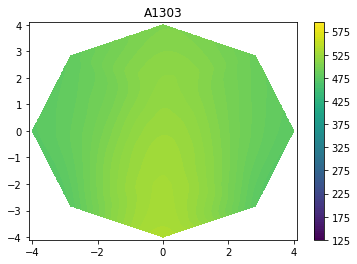

In [240]:
#fig, ax = plt.subplots(nrows=2, ncols=2)
#levels = MaxNLocator(nbins=100).tick_values(125.71, 590.11)

# Interpolate using three different methods and plot
for i in range(0, len(samples)):
    zi = griddata((x, y), df[samples[i]], (xi, yi), method='cubic')
    #r, c = (i) // 2, (i) % 2
    plt.contourf(xi, yi, zi, levels=levels)
    plt.colorbar()
    plt.title(samples[i])
    plt.show()

In [234]:
df.max()

x          4.00
y          4.00
A1300    167.22
A1301    590.11
A1302     -3.10
A1303    538.78
dtype: float64